# 🛒 E-Commerce Sales Analysis & Predictive Modeling (Interactive)

This notebook explores and models e-commerce data from Kaggle, performing exploratory data analysis (EDA), visualizations and interactive visualizations using Plotly, predictive modeling to identify purchase behavior patterns focusing on both **customer behavior** and **product insights**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 📂 Load and Merge Data

In [3]:
sales = pd.read_csv('sales_data.csv')
customers = pd.read_csv('customer_details.csv')
products = pd.read_csv('product_details.csv')

merged_df = sales.merge(customers, left_on='user id', right_on='Customer ID', how='left')
merged_df = merged_df.merge(products, left_on='product id', right_on='Uniqe Id', how='left')
merged_df.to_csv('merged_ecommerce_data.csv', index=False)
print('✅ Merged data saved as merged_ecommerce_data.csv')
display(merged_df.head())

✅ Merged data saved as merged_ecommerce_data.csv


,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID,Age,Gender,Item Purchased,Category_x,...,Product Url,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0,55.0,Male,Blouse,Clothing,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0,19.0,Male,Sweater,Clothing,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0,50.0,Male,Jeans,Clothing,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0,21.0,Male,Sandals,Footwear,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0,45.0,Male,Blouse,Clothing,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


## 📊 Exploratory Data Analysis (EDA)

In [4]:
# Interaction type distribution
fig = px.histogram(merged_df, x='Interaction type', title='Interaction Types Distribution', color='Interaction type')
fig.show()

# Gender distribution
fig = px.pie(merged_df, names='Gender', title='Customer Gender Distribution')
fig.show()

# Age vs Purchases
merged_df['is_purchase'] = merged_df['Interaction type'].apply(lambda x: 1 if x == 'purchase' else 0)
fig = px.box(merged_df, x='Gender', y='Age', color='is_purchase', title='Age vs Purchase Behavior by Gender')
fig.show()

# Payment method preference
fig = px.histogram(merged_df, x='Payment Method', color='Gender', title='Preferred Payment Method by Gender', barmode='group')
fig.show()

## 📦 Product Insights

In [5]:
# Most purchased products
product_counts = merged_df[merged_df['is_purchase'] == 1]['product id'].value_counts().nlargest(10)
fig = px.bar(x=product_counts.index, y=product_counts.values, title='Top 10 Purchased Products')
fig.update_xaxes(title='Product ID')
fig.update_yaxes(title='Purchase Count')
fig.show()

# Monthly trend
merged_df['Time stamp'] = pd.to_datetime(merged_df['Time stamp'], errors='coerce')
merged_df['Month'] = merged_df['Time stamp'].dt.to_period('M').astype(str)
monthly_trend = merged_df[merged_df['is_purchase'] == 1]['Month'].value_counts().sort_index()
fig = px.line(x=monthly_trend.index, y=monthly_trend.values, title='Monthly Purchase Trend', markers=True)
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Purchases')
fig.show()

## 🤖 Predictive Modeling

Accuracy: 0.6555386949924128

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       482
           1       0.30      0.22      0.26       177

    accuracy                           0.66       659
   macro avg       0.52      0.52      0.52       659
weighted avg       0.62      0.66      0.64       659



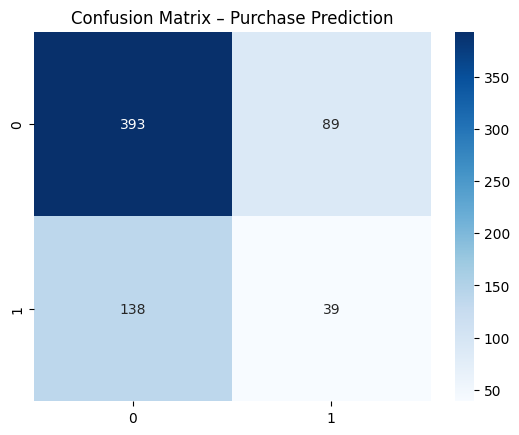

In [6]:
features = ['Age', 'Gender', 'Payment Method', 'Frequency of Purchases']
df_model = merged_df[features + ['is_purchase']].copy()
encoder = LabelEncoder()
for col in ['Gender', 'Payment Method', 'Frequency of Purchases']:
    df_model[col] = encoder.fit_transform(df_model[col].astype(str))

X = df_model.drop('is_purchase', axis=1)
y = df_model['is_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Purchase Prediction')
plt.show()

## 🎯 Feature Importance

In [7]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = px.bar(x=feat_importances.index, y=feat_importances.values, title='Feature Importance – What Drives Purchases?')
fig.update_xaxes(title='Features')
fig.update_yaxes(title='Importance')
fig.show()

## 🔍 Correlation Heatmap

In [8]:
corr = df_model.corr()
fig = px.imshow(corr, text_auto=True, title='Correlation Heatmap – Customer Behavior')
fig.show()